# **The Battle of the Neighborhoods (Week 2)**

### Introduction

Tourism, the act and process of spending time away from home in pursuit of recreation, relaxation, and pleasure, while making use of the commercial provision of services. Tourism boosts the revenue of the economy, creates thousands of jobs, develops the infrastructures of a country, and plants a sense of cultural exchange between foreigners and citizens. Tourism in India is vital for the country's economy. There are 38 World Heritage sites in India that are recognised by the United Nations Educational, Scientific and Cultural Organization (UNESCO) as of August 2019.

### Business Problem

As mentioned earlier, tourism facilitates large number of employment opportunities. This project analyzes the most popular places in a state in India to recommend the best choice for setting up restaurants, hotels, souvenir shops or other businesses that tourism may help flourish. This project will also be helpful for freelancers like translators, artists, etc., to set up stalls.

### Data Description

#### Source : [List of Districts in India - Wikipedia Page](https://en.wikipedia.org/wiki/List_of_districts_in_India)

Beautifulsoup4 package can be used to scrape information and extract all the tables from this Wikipedia page and convert it into a pandas dataframe. Then, Python’s geopy package will be used to obtain the latitude and longitude of all the districts present in the dataframe.

#### Foursquare API Data:
Data about different venues in the specific districts will be needed. In order to gain that information we will use "Foursquare" locational information. Foursquare is a location data provider with information about all manner of venues and events within an area of interest. Such information includes venue names, locations, menus and even photos. As such, the foursquare location platform will be used as the sole data source since all the stated required information can be obtained through the API.

The data retrieved from Foursquare contains information of venues within a specified distance of the longitude and latitude of the postcodes. 

___

### Importing Libraries

In [1]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup
import geocoder
import folium
from geopy.geocoders import Nominatim

import random 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
import json 
from pandas.io.json import json_normalize 
import math

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


### Web-Scraping to create a dataframe

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_districts_in_India"
html_data = requests.get(url).content
soup = BeautifulSoup(html_data,"html5lib")
t = soup.title

In [3]:
tables = soup.find_all("table",{'class':"wikitable"})

In [4]:
df2 = pd.read_html(str(tables))
df2 = pd.DataFrame(df2[0])
State_Unionlist = df2["Name of State or Union Territory"]

In [5]:
l = np.arange(2, 37, 1)

In [6]:
StateUnion =list()

In [7]:
df=pd.read_html(str(tables))
df= pd.DataFrame(df[1])
states = df.shape
for i in range(states[0]):
    StateUnion.append(State_Unionlist[0])
df["State/UnionTerritory"] = StateUnion
o = df.columns

In [8]:
df.rename(columns = {o[2]: "District", o[4] : "Population", o[6] : "Density (/km2)"}, inplace = True)

In [9]:
for i in l:
    dfn = pd.read_html(str(tables))
    df1 = pd.DataFrame(dfn[i])
    StateUnion =list()
    states = df1.shape
    for j in range(states[0]):
        StateUnion.append(State_Unionlist[i-1])
    df1["State/UnionTerritory"] = StateUnion
    o = df1.columns
    df1.rename(columns = {o[2]: "District", o[4] : "Population", o[5] : "Area (km2)", o[6] : "Density (/km2)"}, inplace = True)
    df = df.append(df1, ignore_index=True)

In [10]:
df.isnull().sum()
df.dropna(inplace = True)

In [11]:
df.drop(columns = {"#", "Code[5]"}, inplace = True)

### Dataframe with latitudes and Longitudes 

In [12]:
Indialatlong = pd.read_csv("Indialatlong.csv")

In [13]:
Indialatlong.drop(columns = {"Unnamed: 0"}, inplace = True)

In [14]:
Indialatlong.dropna(inplace = True)

In [15]:
Indialatlong

,District,Headquarters,State/UnionTerritory,Latitude,Longitude
0,Anantapur,Anantapur,Andhra Pradesh,14.654623,77.556260
1,Chittoor,Chittoor,Andhra Pradesh,13.160105,79.155551
2,East Godavari,Kakinada,Andhra Pradesh,17.233496,81.722599
3,Guntur,Guntur,Andhra Pradesh,16.291519,80.454159
4,Kadapa,Kadapa,Andhra Pradesh,14.475294,78.821686
...,...,...,...,...,...
722,Shravasti,Shravasti,Uttar Pradesh,27.504639,80.829466
723,Siddharthnagar,Naugarh,Uttar Pradesh,24.386575,83.078631
724,Sitapur,Sitapur,Uttar Pradesh,26.242511,82.296169
725,Sonbhadra,Robertsganj,Uttar Pradesh,26.575504,80.613762


### Data Visualisation

In [16]:
state = input("Enter the state/union territory you want visit: ")

Enter the state/union territory you want visit:  Uttar Pradesh


In [17]:
geolocator = Nominatim(user_agent="tst_explorer")
location = geolocator.geocode(state)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of ' + state + ' are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Uttar Pradesh are 27.1303344, 80.859666.


In [18]:
df_user_state = Indialatlong[Indialatlong['State/UnionTerritory']==state].reset_index(drop=True)
df_user_state.dropna(inplace = True)
df_user_state

,District,Headquarters,State/UnionTerritory,Latitude,Longitude
0,Agra,Agra,Uttar Pradesh,27.175255,78.009816
1,Aligarh,Aligarh,Uttar Pradesh,27.876990,78.137290
2,Allahabad,Allahabad,Uttar Pradesh,25.438130,81.833800
3,Ambedkar Nagar,Akbarpur,Uttar Pradesh,26.403498,82.607281
4,Amethi,Gauriganj,Uttar Pradesh,26.347383,81.623878
...,...,...,...,...,...
62,Shravasti,Shravasti,Uttar Pradesh,27.504639,80.829466
63,Siddharthnagar,Naugarh,Uttar Pradesh,24.386575,83.078631
64,Sitapur,Sitapur,Uttar Pradesh,26.242511,82.296169
65,Sonbhadra,Robertsganj,Uttar Pradesh,26.575504,80.613762


#### Map of the state with the districts superimposed on it

In [19]:
map_state = folium.Map(location=[latitude, longitude], zoom_start=7)


# add markers to map
for lat, lng, st, district in zip(df_user_state['Latitude'], df_user_state['Longitude'], df_user_state['State/UnionTerritory'], df_user_state['District']):
    label = '{}, {}'.format(district, st)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_state)  
    
map_state

### Foursquare API

In [20]:
#defining Foursquare API credentials
CLIENT_ID = '1G0J0TCQ0VR4A3CPKSYGTQFZWAL3WNYLKCYFQCJB2MQWUHBI' # your Foursquare ID
CLIENT_SECRET = 'JEHA4U1Z1BX3BZIPAYRWRPSV5QMC3S0BHOIEVTI1RZMZFXJZ'  # your Foursquare Secret
VERSION = '20180605'  # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [21]:
#Getting the categories in Foursquare
url2 = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)

category_results = requests.get(url2).json()

In [22]:
#Checking number of main categories and sub-categories present in Foursquare API
categories = len(category_results['response']['categories'])

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    for j in range(len(category_results['response']['categories'][i]['categories'])):
        sub_venues = category_results['response']['categories'][i]['categories'][j]['name']

In [23]:
all_categories = {}

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    all_categories[venues] = i

In [24]:
tourist_category = []
business_category = []
req_categories = ['Arts & Entertainment', 'Nightlife Spot', 'Outdoors & Recreation']
req_categories2 = ['Food', 'Shop & Service', 'Travel & Transport']


for i in req_categories:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    tourist_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        tourist_category.append(sub_venues)

for i in req_categories2:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    business_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        business_category.append(sub_venues)

In [25]:
#Function to get the nearby venues of all the districts in the State
def getNearbyVenues_tourist(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    nearby_venues = nearby_venues[nearby_venues['Venue Category'].isin(tourist_category)]
    
    return(nearby_venues)

In [26]:
state_venues = getNearbyVenues_tourist(names=df_user_state['District'],
                                   latitudes=df_user_state['Latitude'],
                                   longitudes=df_user_state['Longitude']
                                  )

Agra
Aligarh
Allahabad
Ambedkar Nagar
Amethi
Amroha
Auraiya
Azamgarh
Bahraich
Ballia
Banda
Barabanki
Bareilly
Basti
Bhadohi
Bijnor
Budaun
Bulandshahr
Chandauli
Chitrakoot
Deoria
Etah
Etawah
Faizabad
Farrukhabad
Fatehpur
Gautam Buddh Nagar
Ghaziabad
Ghazipur
Gonda
Gorakhpur
Hapur
Hardoi
Hathras
Jalaun
Jaunpur
Jhansi
Kannauj
Kanpur Dehat
Kanpur Nagar
Kasganj
Kaushambi
Kushinagar
Lakhimpur Kheri
Lalitpur
Lucknow
Maharajganj
Mahoba
Mainpuri
Mathura
Mau
Meerut
Mirzapur
Moradabad
Muzaffarnagar
Pilibhit
Raebareli
Rampur
Saharanpur
Sambhal
Sant Kabir Nagar
Shahjahanpur
Shravasti
Siddharthnagar
Sitapur
Sonbhadra
Sultanpur


In [27]:
state_venues

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agra,27.175255,78.009816,Agra Fort | आगरा का किला | آگرہ قلعہ (Agra Fort),27.176607,78.022290,Historic Site
1,Agra,27.175255,78.009816,Taj Mahal | ताज महल | تاج محل (Taj Mahal),27.171047,78.042187,Historic Site
7,Agra,27.175255,78.009816,Mehtab Bagh | मेहताब बाग़ | ماہتاب باغ (Mehtab...,27.180001,78.042090,Garden
9,Agra,27.175255,78.009816,The Oberoi: Swimming Pool,27.168181,78.048730,Pool
13,Agra,27.175255,78.009816,Tomb of Itimad ud Daulah | Baby Taj,27.193029,78.030455,Historic Site
...,...,...,...,...,...,...,...
1005,Sonbhadra,26.575504,80.613762,Zero Degree Lounge,26.854175,80.972599,Nightclub
1023,Sultanpur,25.335649,83.007629,Ganges | गंगा | গঙ্গা | गङ्गा,25.300733,83.013690,River
1038,Sultanpur,25.335649,83.007629,Dhamek Stupa,25.380863,83.024520,Historic Site
1040,Sultanpur,25.335649,83.007629,Suryauday Haveli Shivala Ghat,25.296469,83.006785,Scenic Lookout


In [28]:
no_of_venues = state_venues.groupby('District', as_index=False).count()
no_of_venues = no_of_venues[['District','Venue']]
no_of_venues.rename(columns={'Venue':'No of Venues'}, inplace=True)
no_of_venues

,District,No of Venues
0,Agra,11
1,Allahabad,1
2,Amethi,1
3,Amroha,1
4,Barabanki,2
5,Bijnor,2
6,Bulandshahr,5
7,Chandauli,4
8,Deoria,2
9,Fatehpur,6


<BarContainer object of 28 artists>

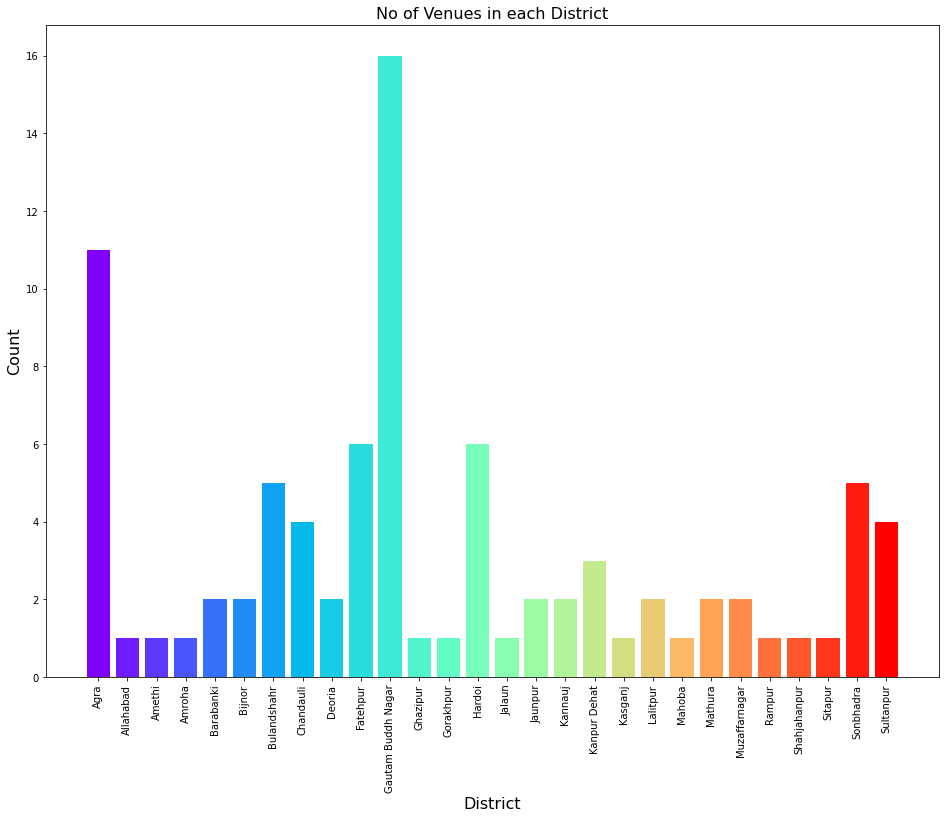

In [29]:
#Count number of venues retrieved in each District
color = cm.rainbow(np.linspace(0, 1, len(no_of_venues["No of Venues"])))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("District", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("No of Venues in each District", fontsize = 16)
plt.bar(no_of_venues["District"], no_of_venues["No of Venues"], color = color)

In [30]:
len(state_venues['Venue Category'].unique())

23

In [31]:
#print unique venue categories
state_venues['Venue Category'].unique()

array(['Historic Site', 'Garden', 'Pool', 'Castle', 'Park', 'River',
       'Plaza', 'Nightclub', 'Mountain', 'National Park', 'Racetrack',
       'Music Venue', 'Scenic Lookout', 'Botanical Garden', 'Bar',
       'Art Gallery', 'Lounge', 'Movie Theater', 'Arcade', 'Playground',
       'Farm', 'Bowling Alley', 'Trail'], dtype=object)

### Analyze Each District

In [32]:
# one hot encoding
state_venues_onehot = pd.get_dummies(state_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
state_venues_onehot['District'] = state_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [state_venues_onehot.columns[-1]] + list(state_venues_onehot.columns[:-1])
state_venues_onehot = state_venues_onehot[fixed_columns]

state_venues_onehot.head()

,District,Arcade,Art Gallery,Bar,Botanical Garden,Bowling Alley,Castle,Farm,Garden,Historic Site,...,National Park,Nightclub,Park,Playground,Plaza,Pool,Racetrack,River,Scenic Lookout,Trail
0,Agra,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Agra,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,Agra,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,Agra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
13,Agra,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#Group rows by neighborhood taking the mean of the frequency of occurrence of each category
state_venues_grouped = state_venues_onehot.groupby('District').mean().reset_index()
state_venues_grouped

,District,Arcade,Art Gallery,Bar,Botanical Garden,Bowling Alley,Castle,Farm,Garden,Historic Site,...,National Park,Nightclub,Park,Playground,Plaza,Pool,Racetrack,River,Scenic Lookout,Trail
0,Agra,0.0000,0.0000,0.00,0.0,0.000000,0.090909,0.0000,0.090909,0.636364,...,0.0,0.0,0.090909,0.0000,0.000,0.090909,0.0,0.00,0.00,0.0
1,Allahabad,0.0000,0.0000,0.00,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0000,0.000,0.000000,0.0,1.00,0.00,0.0
2,Amethi,0.0000,0.0000,0.00,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.0,0.0,1.000000,0.0000,0.000,0.000000,0.0,0.00,0.00,0.0
3,Amroha,0.0000,0.0000,0.00,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0000,0.000,0.000000,0.0,1.00,0.00,0.0
4,Barabanki,0.0000,0.0000,0.00,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.0,0.5,0.000000,0.0000,0.500,0.000000,0.0,0.00,0.00,0.0
5,Bijnor,0.0000,0.0000,0.00,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.5,0.0,0.000000,0.0000,0.000,0.000000,0.0,0.00,0.00,0.0
6,Bulandshahr,0.0000,0.0000,0.00,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.0,0.0,0.200000,0.0000,0.000,0.000000,0.4,0.20,0.00,0.0
7,Chandauli,0.0000,0.0000,0.00,0.0,0.000000,0.000000,0.0000,0.000000,0.500000,...,0.0,0.0,0.000000,0.0000,0.000,0.000000,0.0,0.25,0.25,0.0
8,Deoria,0.0000,0.0000,0.00,0.5,0.000000,0.000000,0.0000,0.000000,0.500000,...,0.0,0.0,0.000000,0.0000,0.000,0.000000,0.0,0.00,0.00,0.0
9,Fatehpur,0.0000,0.0000,0.00,0.0,0.000000,0.000000,0.0000,0.166667,0.666667,...,0.0,0.0,0.000000,0.0000,0.000,0.166667,0.0,0.00,0.00,0.0


In [34]:
#Print each District along with the top 5 most common venues
num_top_venues = no_of_venues['No of Venues'].max()

for hood in state_venues_grouped['District']:
    print("----"+hood+"----")
    temp = state_venues_grouped[state_venues_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agra----
             venue  freq
0    Historic Site  0.64
1           Castle  0.09
2             Pool  0.09
3           Garden  0.09
4             Park  0.09
5           Arcade  0.00
6    National Park  0.00
7   Scenic Lookout  0.00
8            River  0.00
9        Racetrack  0.00
10           Plaza  0.00
11      Playground  0.00
12       Nightclub  0.00
13   Movie Theater  0.00
14     Music Venue  0.00
15     Art Gallery  0.00


----Allahabad----
             venue  freq
0            River   1.0
1           Arcade   0.0
2      Music Venue   0.0
3   Scenic Lookout   0.0
4        Racetrack   0.0
5             Pool   0.0
6            Plaza   0.0
7       Playground   0.0
8             Park   0.0
9        Nightclub   0.0
10   National Park   0.0
11   Movie Theater   0.0
12     Art Gallery   0.0
13        Mountain   0.0
14          Lounge   0.0
15   Historic Site   0.0


----Amethi----
             venue  freq
0             Park   1.0
1           Arcade   0.0
2      Music Venue   0.0


In [35]:
#Function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
#Create the new dataframe and display the top 10 venues for each district
num_top_venues = no_of_venues['No of Venues'].max()

indicators = ['st', 'nd', 'rd']

columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue Category'.format(ind+1))

district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = state_venues_grouped['District']

for ind in np.arange(state_venues_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(state_venues_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,District,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category,9th Most Common Venue Category,10th Most Common Venue Category,11th Most Common Venue Category,12th Most Common Venue Category,13th Most Common Venue Category,14th Most Common Venue Category,15th Most Common Venue Category,16th Most Common Venue Category
0,Agra,Historic Site,Pool,Park,Castle,Garden,Trail,Lounge,Art Gallery,Bar,Botanical Garden,Bowling Alley,Farm,Movie Theater,Mountain,Scenic Lookout,Music Venue
1,Allahabad,River,Trail,Mountain,Art Gallery,Bar,Botanical Garden,Bowling Alley,Castle,Farm,Garden,Historic Site,Lounge,Movie Theater,Scenic Lookout,Music Venue,National Park
2,Amethi,Park,Trail,Mountain,Art Gallery,Bar,Botanical Garden,Bowling Alley,Castle,Farm,Garden,Historic Site,Lounge,Movie Theater,Scenic Lookout,Music Venue,National Park
3,Amroha,River,Trail,Mountain,Art Gallery,Bar,Botanical Garden,Bowling Alley,Castle,Farm,Garden,Historic Site,Lounge,Movie Theater,Scenic Lookout,Music Venue,National Park
4,Barabanki,Plaza,Nightclub,Trail,Lounge,Art Gallery,Bar,Botanical Garden,Bowling Alley,Castle,Farm,Garden,Historic Site,Movie Theater,Mountain,Scenic Lookout,Music Venue


In [37]:
venue_venue_category = state_venues.groupby(['District', 'Venue Category'], as_index=False).agg(lambda x: ", ".join(x))
venue_venue_category.head()

,District,Venue Category,Venue
0,Agra,Castle,Wind Palace
1,Agra,Garden,Mehtab Bagh | मेहताब बाग़ | ماہتاب باغ (Mehtab...
2,Agra,Historic Site,Agra Fort | आगरा का किला | آگرہ قلعہ (Agra For...
3,Agra,Park,Keoladeo National Park
4,Agra,Pool,The Oberoi: Swimming Pool


In [38]:
r, c = district_venues_sorted.shape

for rows in range(r):
    a = district_venues_sorted.iloc[rows, 0]
    for col, col_name in enumerate(district_venues_sorted.columns[1:]):
        b = district_venues_sorted.iloc[rows, col+1]
        pf = venue_venue_category[venue_venue_category['District'].str.contains(a) & venue_venue_category['Venue Category'].str.contains(b)]
        if not pf.empty:
            #print(b)
            idx = pf['Venue'].index.values.astype(int)[0]
            ven = pf['Venue'][idx]
            district_venues_sorted.iloc[rows, district_venues_sorted.columns.get_loc(col_name)] = ven
        elif pf.empty:
            district_venues_sorted.iloc[rows, district_venues_sorted.columns.get_loc(col_name)] = ''

In [39]:
#Most common venues according to venue category in each District
indicators = ['st', 'nd', 'rd']
new = []

for ind in np.arange(no_of_venues['No of Venues'].max()):
    try:
        new.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        new.append('{}th Most Common Venue'.format(ind+1))

district_venues_sorted.columns = district_venues_sorted.columns[:1].tolist() + new
district_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue
0,Agra,Agra Fort | आगरा का किला | آگرہ قلعہ (Agra For...,The Oberoi: Swimming Pool,Keoladeo National Park,Wind Palace,Mehtab Bagh | मेहताब बाग़ | ماہتاب باغ (Mehtab...,,,,,,,,,,,
1,Allahabad,Triveni Sangam,,,,,,,,,,,,,,,
2,Amethi,Frozen Corner,,,,,,,,,,,,,,,
3,Amroha,Garhmukteshwar,,,,,,,,,,,,,,,
4,Barabanki,Patrakarpuram Chauraha,Zero Degree Lounge,,,,,,,,,,,,,,
5,Bijnor,kotdwara,Jim Corbett National Park,,,,,,,,,,,,,,
6,Bulandshahr,"Main Grand Stand @ BIC, Buddh International Ci...",Garhmukteshwar,SAMRAT MIHIR BHOJ PARK ( CITY PARK ),NH7 Weekender,,,,,,,,,,,,
7,Chandauli,"Dhamek Stupa, Archeological Site of Sarnath",Ganges | गंगा | গঙ্গা | गङ्गा,Suryauday Haveli Shivala Ghat,,,,,,,,,,,,,
8,Deoria,สถานที่ดับขันธปรินิพพาน,Ramabhar Stupa,,,,,,,,สถานที่ดับขันธปรินิพพาน,,,,,,
9,Fatehpur,"Taj Mahal | ताज महल | تاج محل (Taj Mahal), Agr...",The Oberoi: Swimming Pool,Mehtab Bagh | मेहताब बाग़ | ماہتاب باغ (Mehtab...,,,,,,,,,,,,,


### Nearby Businesses

In [40]:
LIMIT = 100

def getNearbyBusiness(names, latitudes, longitudes, radius=500):
    
    business_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby business
        business_list.append([(name,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_business = pd.DataFrame([item for business_list in business_list for item in business_list])
    nearby_business.columns = ['Venue',
                    'Business', 
                  'BLatitude', 
                  'BLongitude', 
                  'Business Category']
    
    nearby_business = nearby_business[nearby_business['Business Category'].isin(business_category)]
    
    return(nearby_business)

In [41]:
nearby_business = getNearbyBusiness(names=state_venues['Venue'],
                                   latitudes=state_venues['Venue Latitude'],
                                   longitudes=state_venues['Venue Longitude']
                                  )

Agra Fort | आगरा का किला | آگرہ قلعہ (Agra Fort)
Taj Mahal | ताज महल | تاج محل (Taj Mahal)
Mehtab Bagh | मेहताब बाग़ | ماہتاب باغ (Mehtab Bagh)
The Oberoi: Swimming Pool
Tomb of Itimad ud Daulah | Baby Taj
Tomb of Akbar the Great
Buland Darwaza | बुलंद दरवाज़ा | بُلند دروازه‎, (Buland Darwaza)
Wind Palace
Fatehpur Sikri
Keoladeo National Park
Tomb Of Salim Chisti
Triveni Sangam
Frozen Corner
Garhmukteshwar
Patrakarpuram Chauraha
Zero Degree Lounge
kotdwara
Jim Corbett National Park
Main Grand Stand @ BIC
Buddh International Circuit
NH7 Weekender
SAMRAT MIHIR BHOJ PARK ( CITY PARK )
Garhmukteshwar
Ganges | गंगा | গঙ্গা | गङ्गा
Dhamek Stupa
Suryauday Haveli Shivala Ghat
Archeological Site of Sarnath
สถานที่ดับขันธปรินิพพาน
Ramabhar Stupa
Taj Mahal | ताज महल | تاج محل (Taj Mahal)
Agra Fort | आगरा का किला | آگرہ قلعہ (Agra Fort)
Mehtab Bagh | मेहताब बाग़ | ماہتاب باغ (Mehtab Bagh)
The Oberoi: Swimming Pool
Tomb of Itimad ud Daulah | Baby Taj
Tomb of Akbar the Great
Lodhi Gardens (लोधी बाग़

In [42]:
nearby_business

,Venue,Business,BLatitude,BLongitude,Business Category
6,Taj Mahal | ताज महल | تاج محل (Taj Mahal),Tajmahal,27.174932,78.042160,Indian Restaurant
7,Taj Mahal | ताज महल | تاج محل (Taj Mahal),Café Coffee Day,27.170451,78.043754,Café
8,Taj Mahal | ताज महल | تاج محل (Taj Mahal),Yash Restaurant,27.168924,78.043246,Indian Restaurant
9,Taj Mahal | ताज महल | تاج محل (Taj Mahal),Kamal Hotel,27.169115,78.042650,Hotel
10,Taj Mahal | ताज महल | تاج محل (Taj Mahal),Shankara Vegis Restaurant,27.169167,78.042424,Indian Restaurant
...,...,...,...,...,...
804,Suryauday Haveli Shivala Ghat,Bread of Life Bakery,25.295994,83.004382,Bakery
805,Suryauday Haveli Shivala Ghat,Hotel Heritage Inn | Varanasi,25.293528,83.005024,Hotel
806,Suryauday Haveli Shivala Ghat,Benares,25.293599,83.005175,Indian Restaurant
808,Suryauday Haveli Shivala Ghat,Ganga Love,25.294294,83.006061,Hotel


In [43]:
no_nearby_business = nearby_business.groupby('Business Category', as_index=False).count()
no_nearby_business = no_nearby_business[['Business Category','Business']]
no_nearby_business.rename(columns={'Business':'No of Businesses'}, inplace=True)
no_nearby_business

,Business Category,No of Businesses
0,American Restaurant,9
1,Asian Restaurant,16
2,BBQ Joint,8
3,Bagel Shop,1
4,Bakery,9
5,Bistro,3
6,Bookstore,3
7,Breakfast Spot,3
8,Burger Joint,4
9,Café,57


In [44]:
len(nearby_business['Business Category'].unique())

58

### Analyse all business categories

In [45]:
# one hot encoding
nearby_business_onehot = pd.get_dummies(nearby_business[['Business Category']], prefix="", prefix_sep="")

# add venue column back to dataframe
nearby_business_onehot['Venue'] = nearby_business['Venue'] 

# move venue column to the first column
fixed_columns = [nearby_business_onehot.columns[-1]] + list(nearby_business_onehot.columns[:-1])
nearby_business_onehot = nearby_business_onehot[fixed_columns]

nearby_business_onehot.head()

,Venue,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Bookstore,Breakfast Spot,Burger Joint,...,Shopping Mall,Smoke Shop,Snack Place,Spa,Steakhouse,Tea Room,Tourist Information Center,Toy / Game Store,Train Station,Turkish Restaurant
6,Taj Mahal | ताज महल | تاج محل (Taj Mahal),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Taj Mahal | ताज महल | تاج محل (Taj Mahal),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Taj Mahal | ताज महल | تاج محل (Taj Mahal),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Taj Mahal | ताज महल | تاج محل (Taj Mahal),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Taj Mahal | ताज महल | تاج محل (Taj Mahal),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#Group rows by venues taking the mean of the frequency of occurrence of each category
nearby_business_grouped = nearby_business_onehot.groupby('Venue').mean().reset_index()
nearby_business_grouped

,Venue,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Bookstore,Breakfast Spot,Burger Joint,...,Shopping Mall,Smoke Shop,Snack Place,Spa,Steakhouse,Tea Room,Tourist Information Center,Toy / Game Store,Train Station,Turkish Restaurant
0,Anand Bhawan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.2,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000
1,Blue Bar,0.000000,0.050000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.05,0.000000,0.050000,0.0,0.000000,0.0,0.000000
2,Cawnpore Club,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000
3,Cenotaphs of Orchha,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000
4,Cinemax,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000
5,Classic Ice Cream Parlour,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000
6,Connaught Place | कनॉट प्लेस (Connaught Place),0.000000,0.025000,0.050000,0.000000,0.025000,0.025000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.00,0.000000,0.025000,0.0,0.000000,0.0,0.000000
7,DLF CyberHub,0.041667,0.062500,0.020833,0.000000,0.000000,0.020833,0.000000,0.020833,0.000000,...,0.000000,0.0,0.0,0.00,0.000000,0.020833,0.0,0.000000,0.0,0.000000
8,Fatehpur Sikri,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000
9,Garhmukteshwar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000


In [47]:
#Print the top 5 most common business with the venues
num_top_business = 5

for hood in nearby_business_grouped['Venue']:
    print("----"+hood+"----")
    temp = nearby_business_grouped[nearby_business_grouped['Venue'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_business))
    print('\n')

----Anand Bhawan----
               venue  freq
0  Indian Restaurant   0.2
1  Food & Drink Shop   0.2
2        Snack Place   0.2
3    Motorcycle Shop   0.2
4           Pharmacy   0.2


----Blue Bar----
               venue  freq
0  Indian Restaurant  0.20
1              Hotel  0.20
2               Café  0.15
3         Restaurant  0.05
4   Asian Restaurant  0.05


----Cawnpore Club----
                venue  freq
0           Gastropub   1.0
1           Rest Area   0.0
2   Indian Restaurant   0.0
3  Italian Restaurant   0.0
4  Light Rail Station   0.0


----Cenotaphs of Orchha----
                venue  freq
0               Hotel   1.0
1           Rest Area   0.0
2   Indian Restaurant   0.0
3  Italian Restaurant   0.0
4  Light Rail Station   0.0


----Cinemax----
                 venue  freq
0          Pizza Place   1.0
1  American Restaurant   0.0
2            Rest Area   0.0
3    Indian Restaurant   0.0
4   Italian Restaurant   0.0


----Classic Ice Cream Parlour----
                  

In [48]:
#function to sort the business in descending order
def return_most_common_business(row, num_top_business):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_business]

In [49]:
# 10 Most common venues according to venue category in each District
num_top_business = 10

indicators = ['st', 'nd', 'rd']

columns = ['Venue']
for ind in np.arange(num_top_business):
    try:
        columns.append('{}{} Most Common Business'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Business'.format(ind+1))

nearby_business_sorted = pd.DataFrame(columns=columns)
nearby_business_sorted['Venue'] = nearby_business_grouped['Venue']

for ind in np.arange(nearby_business_grouped.shape[0]):
    nearby_business_sorted.iloc[ind, 1:] = return_most_common_business(nearby_business_grouped.iloc[ind, :], num_top_business)

nearby_business_sorted.head()

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
0,Anand Bhawan,Food & Drink Shop,Indian Restaurant,Snack Place,Motorcycle Shop,Pharmacy,Turkish Restaurant,Cosmetics Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant
1,Blue Bar,Hotel,Indian Restaurant,Café,Asian Restaurant,Food Truck,Tea Room,French Restaurant,Spa,Diner,Bistro
2,Cawnpore Club,Gastropub,Cosmetics Shop,Food Truck,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant,Donut Shop
3,Cenotaphs of Orchha,Hotel,Turkish Restaurant,Cosmetics Shop,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant,Donut Shop
4,Cinemax,Pizza Place,Turkish Restaurant,Cosmetics Shop,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant,Donut Shop


### K-Means Clustering

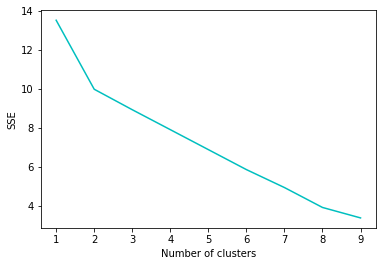

In [50]:
# Finding the optimal K value
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(nearby_business_grouped.drop('Venue',axis=1))
    nearby_business_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), color = "c")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [51]:
#Run k-means to cluster the neighbourhoods into 5 clusters
# set number of clusters
kclusters = 3
nearby_business_grouped_clustering = nearby_business_grouped.drop('Venue', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nearby_business_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 2, 1, 0, 0, 0, 2, 1], dtype=int32)

In [52]:
#create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood
# add clustering label
nearby_business_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nearby_business_merged = nearby_business[['Venue']]
new_state_venues = state_venues[['Venue', 'Venue Latitude', 'Venue Longitude']]

nearby_business_merged = nearby_business_merged.join(new_state_venues.set_index('Venue'), on='Venue')

# merge nearby_business_grouped with nearby_business to add latitude/longitude for each neighborhood
nearby_business_merged = nearby_business_merged.join(nearby_business_sorted.set_index('Venue'), on='Venue')

nearby_business_merged.drop_duplicates(subset='Venue', keep='first', inplace=True)
nearby_business_merged

,Venue,Venue Latitude,Venue Longitude,Cluster Labels,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
6,Taj Mahal | ताज महल | تاج محل (Taj Mahal),27.171047,78.042187,0,Indian Restaurant,Hotel,Café,Restaurant,Turkish Restaurant,Cosmetics Shop,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant
23,The Oberoi: Swimming Pool,27.168181,78.048730,0,Hotel,Tourist Information Center,Indian Restaurant,Italian Restaurant,Turkish Restaurant,Cosmetics Shop,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant
33,Tomb of Itimad ud Daulah | Baby Taj,27.193029,78.030455,1,Café,Restaurant,Turkish Restaurant,Cosmetics Shop,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant
37,Tomb of Akbar the Great,27.216249,77.951152,2,Hotel,Turkish Restaurant,Cosmetics Shop,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant,Donut Shop
48,Fatehpur Sikri,27.097704,77.671153,2,Hotel,Coffee Shop,Turkish Restaurant,Cosmetics Shop,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant
62,Garhmukteshwar,28.766087,78.110279,1,Rest Area,Convenience Store,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant,Donut Shop,Diner
64,Patrakarpuram Chauraha,26.852901,80.999498,1,Café,Turkish Restaurant,Cosmetics Shop,Food Truck,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant
69,Zero Degree Lounge,26.854175,80.972599,0,Hotel,Indian Restaurant,BBQ Joint,Shopping Mall,Café,Turkish Restaurant,Deli / Bodega,Food & Drink Shop,Flea Market,Fast Food Restaurant
80,kotdwara,29.743908,78.519366,2,Hotel,Market,Turkish Restaurant,French Restaurant,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant
98,SAMRAT MIHIR BHOJ PARK ( CITY PARK ),28.473897,77.520304,0,Asian Restaurant,Diner,Pizza Place,Turkish Restaurant,Cosmetics Shop,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant


### Cluster Map

In [53]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_business_merged['Venue Latitude'], nearby_business_merged['Venue Longitude'], nearby_business_merged['Venue'], nearby_business_merged['Cluster Labels']):
    if not math.isnan(cluster):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[int(cluster)],
            fill=True,
            fill_color=rainbow[int(cluster)],
            fill_opacity=0.7).add_to(map_clusters)
map_clusters 

### Cluster Examination

#### Cluster 1

In [54]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 0, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
6,Taj Mahal | ताज महल | تاج محل (Taj Mahal),Indian Restaurant,Hotel,Café,Restaurant,Turkish Restaurant,Cosmetics Shop,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant
23,The Oberoi: Swimming Pool,Hotel,Tourist Information Center,Indian Restaurant,Italian Restaurant,Turkish Restaurant,Cosmetics Shop,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant
69,Zero Degree Lounge,Hotel,Indian Restaurant,BBQ Joint,Shopping Mall,Café,Turkish Restaurant,Deli / Bodega,Food & Drink Shop,Flea Market,Fast Food Restaurant
98,SAMRAT MIHIR BHOJ PARK ( CITY PARK ),Asian Restaurant,Diner,Pizza Place,Turkish Restaurant,Cosmetics Shop,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant
111,Suryauday Haveli Shivala Ghat,Hotel,Indian Restaurant,Bakery,Café,Turkish Restaurant,Deli / Bodega,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant
173,Connaught Place | कनॉट प्लेस (Connaught Place),Indian Restaurant,Café,Coffee Shop,BBQ Joint,Restaurant,Dessert Shop,Hotel,Deli / Bodega,Gastropub,Molecular Gastronomy Restaurant
235,Lantern's,Fast Food Restaurant,Convenience Store,Pizza Place,Hotel,Light Rail Station,Smoke Shop,Food & Drink Shop,Flea Market,Falafel Restaurant,Dumpling Restaurant
253,ISA KHAN’S GARDEN TOMB,Indian Restaurant,Pizza Place,BBQ Joint,Turkish Restaurant,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant
260,Kunzum Travel Cafe,Café,Indian Restaurant,Restaurant,Bakery,American Restaurant,Coffee Shop,Italian Restaurant,Mediterranean Restaurant,Asian Restaurant,Bagel Shop
310,b-bar,Indian Restaurant,Clothing Store,Shopping Mall,Burger Joint,Hotel,Donut Shop,Café,Restaurant,Asian Restaurant,Fast Food Restaurant


#### Cluster 2

In [55]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 1, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
33,Tomb of Itimad ud Daulah | Baby Taj,Café,Restaurant,Turkish Restaurant,Cosmetics Shop,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant
62,Garhmukteshwar,Rest Area,Convenience Store,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant,Donut Shop,Diner
64,Patrakarpuram Chauraha,Café,Turkish Restaurant,Cosmetics Shop,Food Truck,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant
168,Lodhi Gardens (लोधी बाग़) (Lodhi Gardens),Food Court,Middle Eastern Restaurant,Turkish Restaurant,Cosmetics Shop,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant,Donut Shop
709,Cinemax,Pizza Place,Turkish Restaurant,Cosmetics Shop,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant,Donut Shop


#### Cluster 3

In [56]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 2, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
37,Tomb of Akbar the Great,Hotel,Turkish Restaurant,Cosmetics Shop,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant,Donut Shop
48,Fatehpur Sikri,Hotel,Coffee Shop,Turkish Restaurant,Cosmetics Shop,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant
80,kotdwara,Hotel,Market,Turkish Restaurant,French Restaurant,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant
124,สถานที่ดับขันธปรินิพพาน,Hotel,Turkish Restaurant,Cosmetics Shop,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant,Donut Shop
501,Shakti Nagar,Breakfast Spot,Turkish Restaurant,Cosmetics Shop,Food Truck,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant
688,Shahi Quila,Train Station,Turkish Restaurant,Cosmetics Shop,Food Truck,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant
692,Jahangir Mahal,Hotel,Turkish Restaurant,Cosmetics Shop,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant,Donut Shop
693,Cenotaphs of Orchha,Hotel,Turkish Restaurant,Cosmetics Shop,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant,Donut Shop
